In [ ]:
# 복습!
# 1. 인덱스를 설정하는 이유?
# 2. 특정 값으로 데이터를 정렬하려면 어떤 함수를 써야 하는가?
# 3. 열 이름을 바꾸려면 어떤 함수를 써야 하는가?
# 4. 조건을 숫자 범위로 인덱싱하려면?
# 5. 특정 범위를 문자로 인덱싱하려면 어떤 함수를 써야 하는가?

In [ ]:
# 파일 다운로드

import requests

def 다운로드(파일명, 링크):
    with open(파일명, "wb") as f:
        res = requests.get(링크)
        f.write(res.content)

파일명 = "연비.xlsx"
다운로드_링크 = "https://github.com/tyjeon24/keri-pythontraining/raw/main/Week%203/3-1/%EC%97%B0%EB%B9%84.xlsx"
다운로드(파일명, 다운로드_링크)

In [ ]:
# 폰트 설정

%matplotlib inline  

import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕

if not os.path.exists(path):
    !apt-get update -qq
    !apt-get install fonts-nanum* -qq

font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()
print(font_name)

# 한글 폰트가 적용이 안 되는 경우 런타임 - 런타임 다시 시작을 눌러 재시작할 것.

NanumGothic


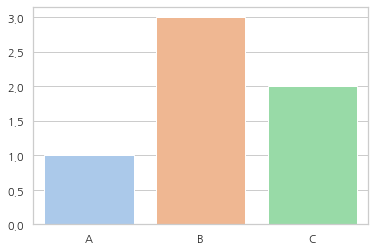

In [ ]:
# 1. 패키지 불러오기
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

막대그래프 = sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])
막대그래프

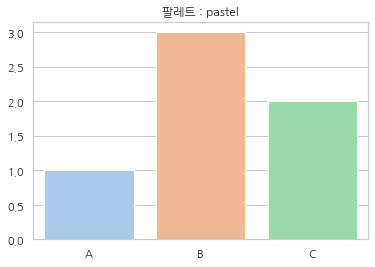

In [ ]:
# 2. 테마 설정하기
# 교안을 참조하여 style 및 palette를 설정해보세요.

sns.set_theme(style='whitegrid', # ["darkgrid", "whitegrid", "dark", "white", "ticks"]
              palette="pastel", 
              font="NanumGothic", 
              rc={"axes.unicode_minus":False}# 마이너스 기호가 출력 시 깨지는 문제 방}, # 크기 설정
              
        )

막대그래프 = sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])
막대그래프.set_title("팔레트 : pastel")
막대그래프

In [ ]:
# 3. 데이터 불러오기
연비 = pd.read_excel("연비.xlsx")

# 데이터의 kmpl은 km per liter, 즉 연비를 의미합니다.
연비

,kmpl,배기량,마력,무게,국가,name
0,7.65,307.00,130.00,3504,usa,chevrolet chevelle malibu
1,6.38,350.00,165.00,3693,usa,buick skylark 320
2,7.65,318.00,150.00,3436,usa,plymouth satellite
3,6.80,304.00,150.00,3433,usa,amc rebel sst
4,7.23,302.00,140.00,3449,usa,ford torino
...,...,...,...,...,...,...
393,11.48,140.00,86.00,2790,usa,ford mustang gl
394,18.71,97.00,52.00,2130,europe,vw pickup
395,13.61,135.00,84.00,2295,usa,dodge rampage
396,11.90,120.00,79.00,2625,usa,ford ranger


In [ ]:
# 4. 그래프 - relplot
# 그래프 함수는 x, y, data라는 파라미터를 갖는다는 것만 기억하면 됩니다.

# sns.scatterplot(x=X축, y=Y축, data=데이터)
# sns.lineplot(x=X축, y=Y축, data=데이터)
# sns.relplot(x=X축, y=Y축, data=데이터)
# 이런 식으로 x, y, data가 들어갑니다.

# seaborn이 업데이트되며 relplot 하나로 lineplot, scatterplot 함수의 기능을 모두 활용할 수 있게 되었습니다.
# 즉 relplot 하나만 알면 됩니다.

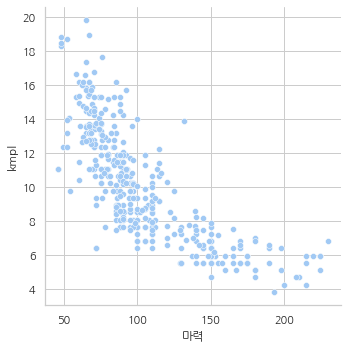

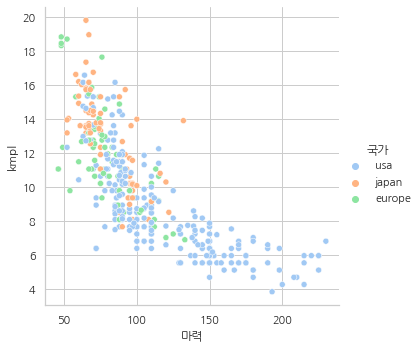

In [ ]:
# 4.1. scatterplot
# 산점도입니다. x, y축이 연속형 데이터일 때 사용합니다.

X축 = "마력"
Y축 = "kmpl"
데이터 = 연비

sns.relplot(x=X축, y=Y축, data=데이터)

색구분기준 = "국가"
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준) # 카테고리별 색깔 지정

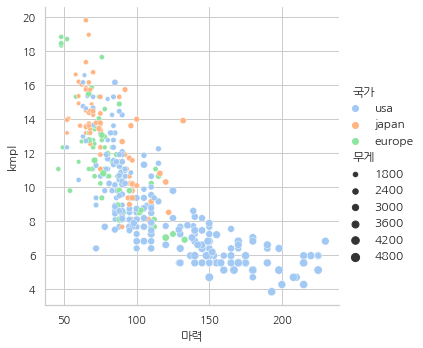

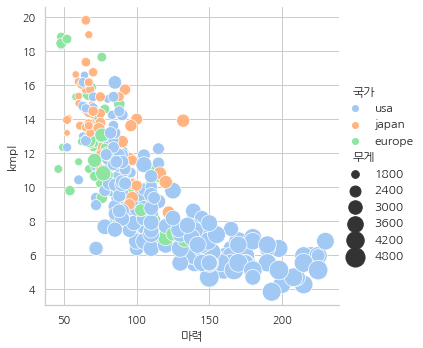

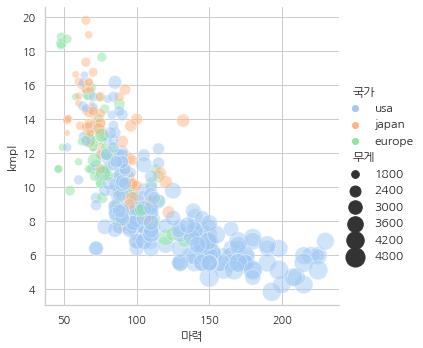

In [ ]:
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준, size="무게") # 무게에 따른 크기 지정
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준, size="무게", sizes=(40, 400)) # 점의 사이즈 지정
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준, size="무게", sizes=(40, 400), alpha=.5) # 투명도 지정
# sizes에 들어가는 숫자는 점의 최소 크기, 최대 크기를 의미합니다.

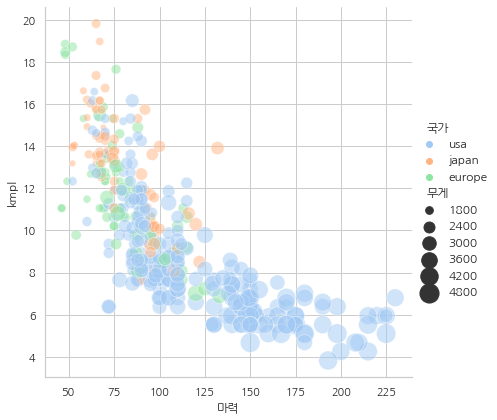

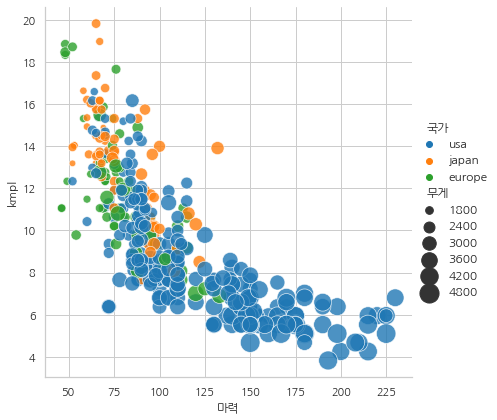

In [ ]:
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준, size="무게", sizes=(40, 400), alpha=.5, height=6) # 그래프 크기 지정 
sns.relplot(x=X축, y=Y축, data=데이터, hue=색구분기준, size="무게", sizes=(40, 400), alpha=.8, height=6, palette = "tab10") # alpha, 팔레트 값 지정

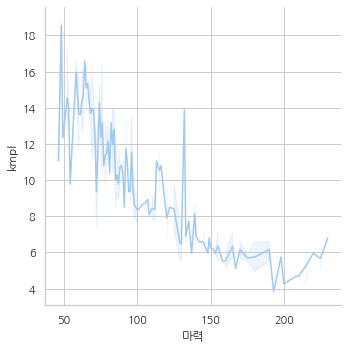

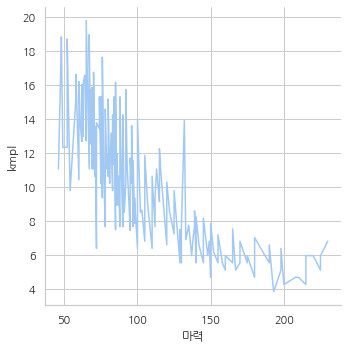

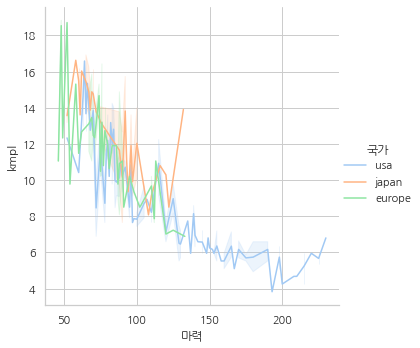

In [ ]:
# 4.2. lineplot

X축 = "마력"
Y축 = "kmpl"
데이터 = 연비

sns.relplot(x=X축, y=Y축, data=데이터, kind="line") # 기본적으로 선을 표현하되, 데이터의 95%만큼을 표현하기 위해 신뢰구간을 추가로 그려줍니다.
sns.relplot(x=X축, y=Y축, data=데이터, kind="line", estimator=None) # 추정 범위를 제거합니다.
sns.relplot(x=X축, y=Y축, data=데이터, kind="line", hue=색구분기준)

# hue, size, siezes, alpha, height 모두 사용할 수 있습니다.

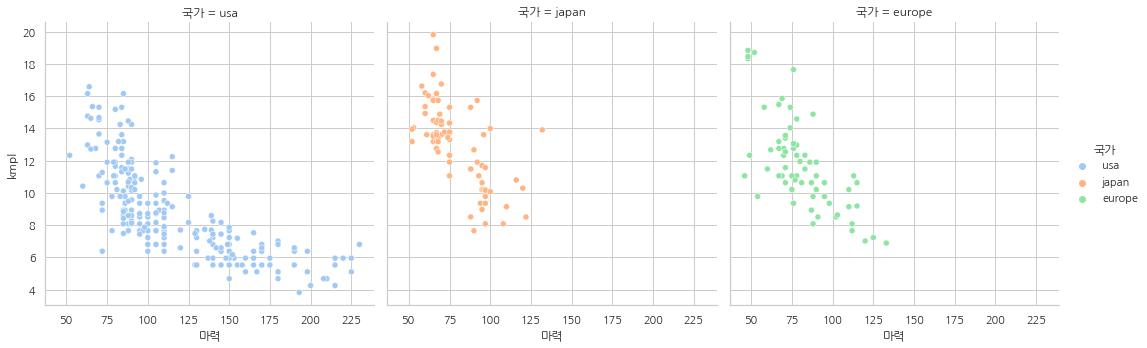

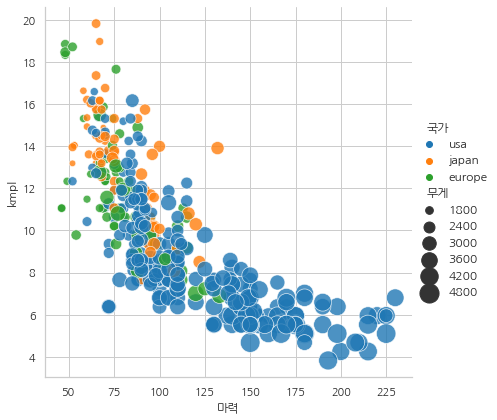

In [ ]:
# 5. relplot으로 여러 변수 비교하기
# col 파라미터를 통해 여러 그래프를 동시에 볼 수 있습니다.

X축 = "마력"
Y축 = "kmpl"
데이터 = 연비

sns.relplot(x=X축, y=Y축, data=데이터, hue="국가", col="국가")
sns.relplot(x=X축, y=Y축, data=데이터, hue="국가", size="무게", sizes=(40, 400), alpha=.8, height=6, palette="tab10") # 비교용 그래프

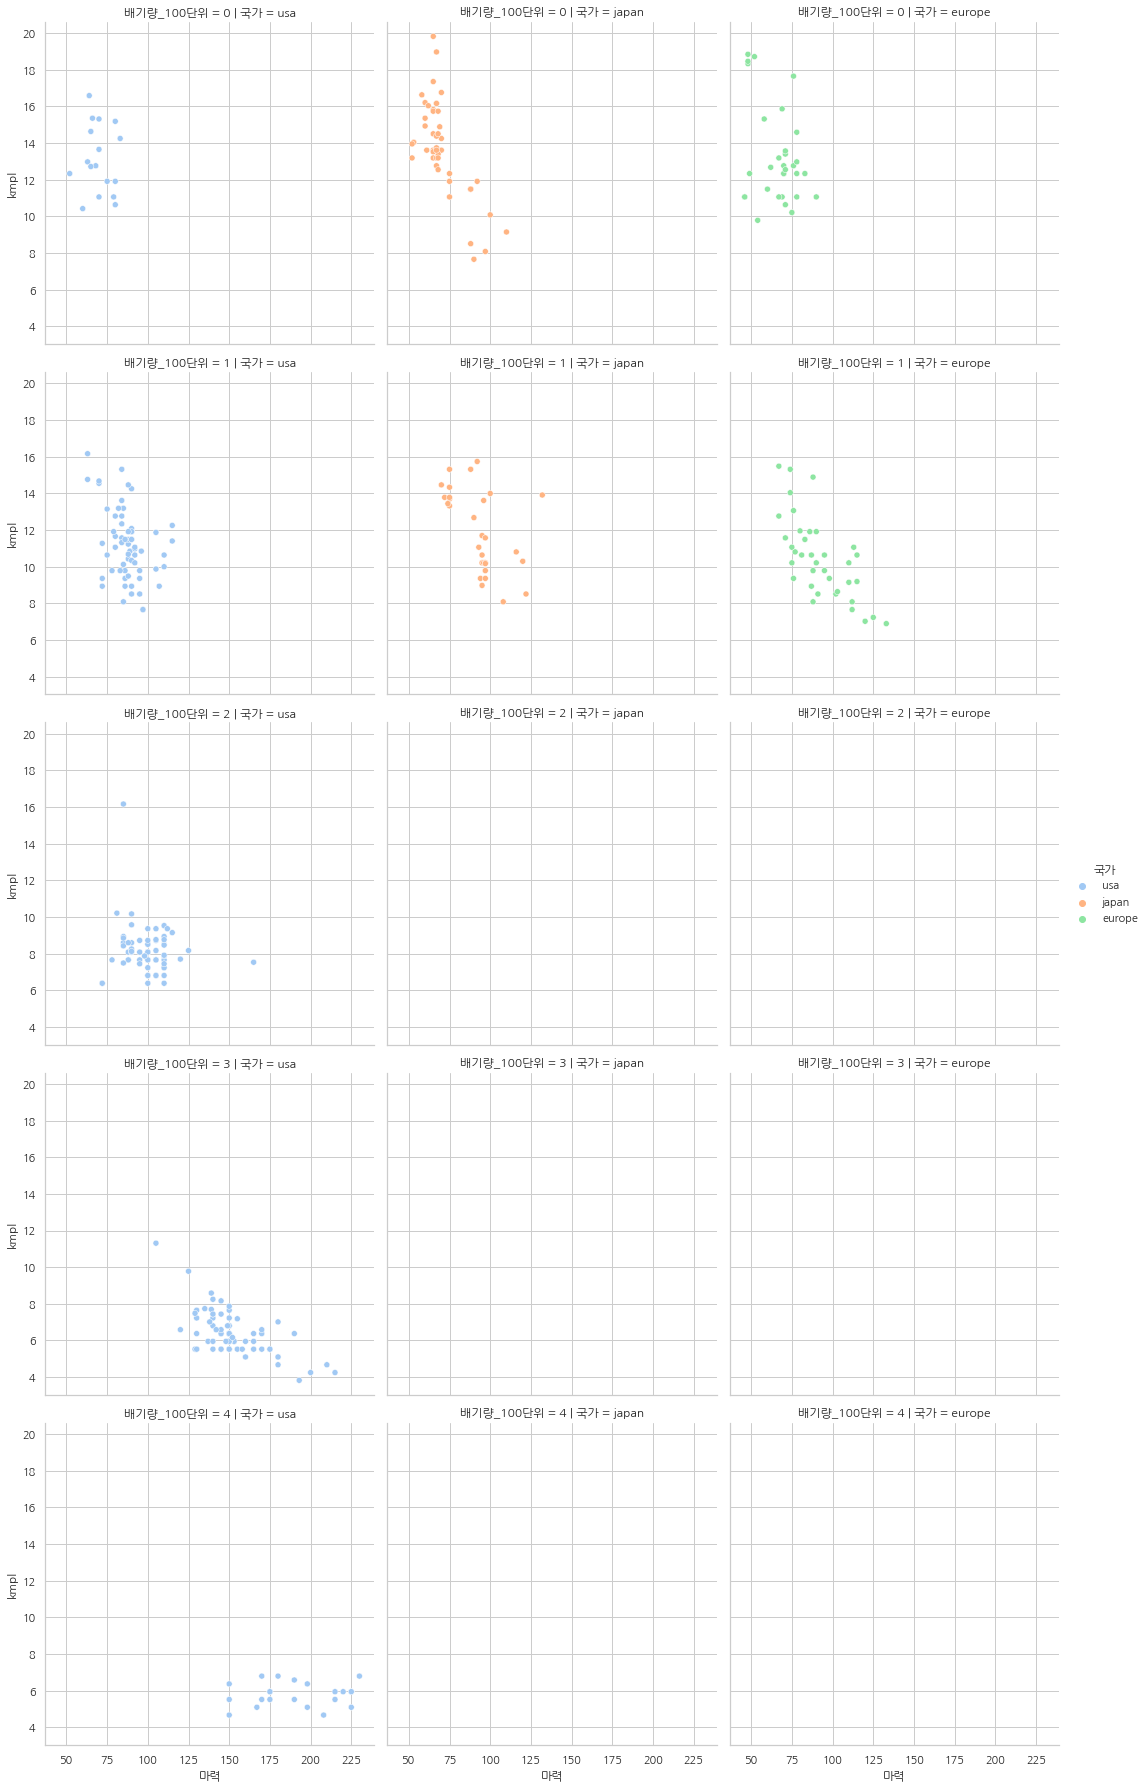

In [ ]:
# row, col 파라미터를 통해 여러 그래프를 가로, 세로로 확장해서 여러 변수에 대한 데이터 분포를 확인할 수 있습니다.

연비["배기량_100단위"] = 연비["배기량"] // 100
연비["배기량_100단위"] = 연비["배기량_100단위"].astype(int)

sns.relplot(x=X축, y=Y축, data=데이터, hue="국가", col="국가", row="배기량_100단위")